# Import Dependencies

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

# Create a New Neural Network Template

![](neural_network.png)

By creating a new class

In [10]:
class BasicNN(nn.Module): # Inherit

    def __init__(self):
        '''Create params for weights and biases.'''
        super().__init__()

        # Init weights and biases
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # No need "requires gradient" because don't need to optimise. Use tensors to accelerate computing
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)

    def forward(self, input):
        '''Connect weights and biases to inputs, activation functions, outputs. Done by doing a forward pass. Run the input through the NN'''
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu) # Activation function output
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

## Unoptimised NN

In [16]:
class BasicNN_train(nn.Module): # Inherit

    def __init__(self):
        '''Create params for weights and biases.'''
        super().__init__()

        # Init weights and biases
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # No need "requires gradient" because don't need to optimise. Use tensors to accelerate computing
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True) # Changed here, this param should be optimised

    def forward(self, input):
        '''Connect weights and biases to inputs, activation functions, outputs. Done by doing a forward pass. Run the input through the NN'''
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu) # Activation function output
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

# Test New NN

## Create Input Data

In [17]:
input_doses = torch.linspace(start=0, end=1, steps=11) # Create tensor with a sequence of 11 values from 0 to 1 inclusive.
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

## Create NN

In [18]:
model = BasicNN() # Standard Pytorch name

In [19]:
output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

## Draw Graph

In [30]:
def draw_graph(input_doses=input_doses, output_values=output_values):
    '''Draw graph for `output_values` over `input_doses`'''

    sns.set(style='whitegrid')

    sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
    # .detach() to create a tensor that only has the values. Used when parameter has a gradient.

    plt.ylabel('Effectiveness')
    plt.xlabel('Dose')

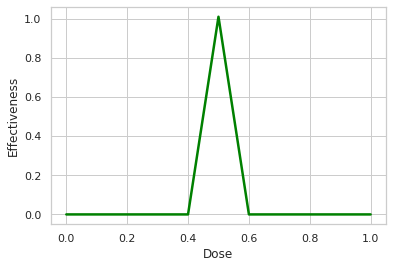

In [28]:
draw_graph(input_doses=input_doses,output_values=output_values)

# Train NN With Back Propagation

## Check Performance

In [36]:
input_doses_train = input_doses

In [37]:
model_train = BasicNN_train()

In [38]:
output_values_train = model_train(input_doses_train)

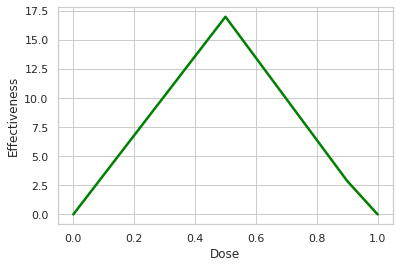

In [39]:
draw_graph(input_doses=input_doses_train, output_values=output_values_train)

## Create Training Data

In [40]:
inputs = torch.tensor([0.0, 0.5, 1.0])
labels = torch.tensor([0.0, 1.0, 0.0])

## Optimise NN

In [41]:
def train(model=model):
    '''Optimise trainable parameters with SGD and back propagation.'''
    
    optimizer = SGD(model.parameters(), lr=0.1) # .parameters() will optimise Parameter objects whose require_grad=True

    print("Final bias, before optimization: " + str(model_train.final_bias.data) + "\n")

    # Stochastic Gradient Descent
    for epoch in range(100): # Repeat until total loss is small enough/reached 100 epochs

        total_loss = 0

        for iteration in range(len(inputs)):

            input_i = inputs[iteration]
            label_i = labels[iteration]

            output_i = model(input_i)

            loss = (output_i - label_i) ** 2 # Squared residual

            loss.backward() # Calculate derivative of loss function (d SR1 / d bfinal). It adds to the previoius derivatie (accumulates).

            total_loss += float(loss)

        if (total_loss < 0.0001): # Check is loss is small enough
            print("Number of steps: " + str(epoch))
            break

        optimizer.step() # Change step size if loss is not small enough. Also keep tracks of the derivatives.
        optimizer.zero_grad() # To clear all the derivatives from the previous step size

        print("Step: " + str(epoch) + "\nTotal Loss: " + str(total_loss) + "\nFinal Bias: " + str(model.final_bias.data) + "\n")

    print("Final bias, after optimization", str(model.final_bias.data) + "\n")

In [42]:
train(model=model_train)

Final bias, before optimization: tensor(0.)

Step: 0
Total Loss: 256.3200988769531
Final Bias: tensor(-3.2020)

Step: 1
Total Loss: 164.0448760986328
Final Bias: tensor(-5.7636)

Step: 2
Total Loss: 104.98870849609375
Final Bias: tensor(-7.8129)

Step: 3
Total Loss: 67.1927719116211
Final Bias: tensor(-9.4523)

Step: 4
Total Loss: 43.00336837768555
Final Bias: tensor(-10.7638)

Step: 5
Total Loss: 27.522159576416016
Final Bias: tensor(-11.8131)

Step: 6
Total Loss: 17.614181518554688
Final Bias: tensor(-12.6525)

Step: 7
Total Loss: 11.273076057434082
Final Bias: tensor(-13.3240)

Step: 8
Total Loss: 7.21476936340332
Final Bias: tensor(-13.8612)

Step: 9
Total Loss: 4.6174516677856445
Final Bias: tensor(-14.2909)

Step: 10
Total Loss: 2.9551703929901123
Final Bias: tensor(-14.6348)

Step: 11
Total Loss: 1.8913096189498901
Final Bias: tensor(-14.9098)

Step: 12
Total Loss: 1.210437297821045
Final Bias: tensor(-15.1298)

Step: 13
Total Loss: 0.7746805548667908
Final Bias: tensor(-15.3059

## Evaluate Results

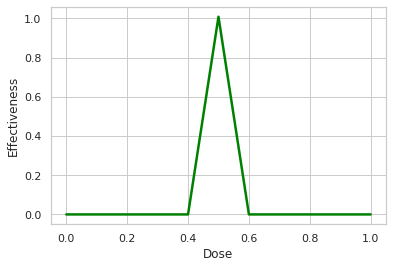

In [45]:
output_values_train = model_train(input_doses_train)

draw_graph(input_doses=input_doses_train, output_values=output_values_train)